In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 12]

pd.set_option('display.max_colwidth', 100)
rawData = pd.read_csv("drive/My Drive/Colab Notebooks/comments.csv")
rawData.head()

id    target  ... identity_annotator_count  toxicity_annotator_count
0  59848  0.000000  ...                        0                         4
1  59849  0.000000  ...                        0                         4
2  59852  0.000000  ...                        0                         4
3  59855  0.000000  ...                        0                         4
4  59856  0.893617  ...                        4                        47

[5 rows x 45 columns]

### Distribution of toxic and non-toxic comments

Are people optimistic or passimistic?

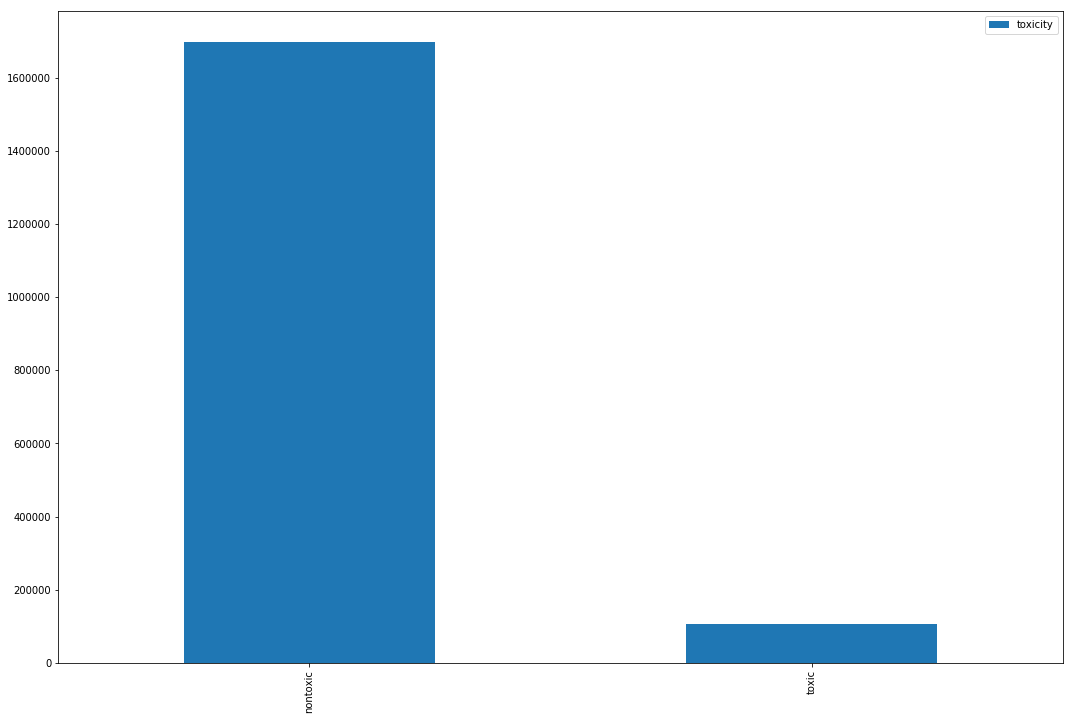

In [0]:
distribution = rawData["target"].value_counts(bins=2)
df_distribution = distribution.to_frame()
df_distribution.index = ["nontoxic","toxic"]
df_distribution = df_distribution.rename(columns={"target": "toxicity"})
df_distribution
df_distribution.plot.bar()

### Correlation between comment length and toxicity

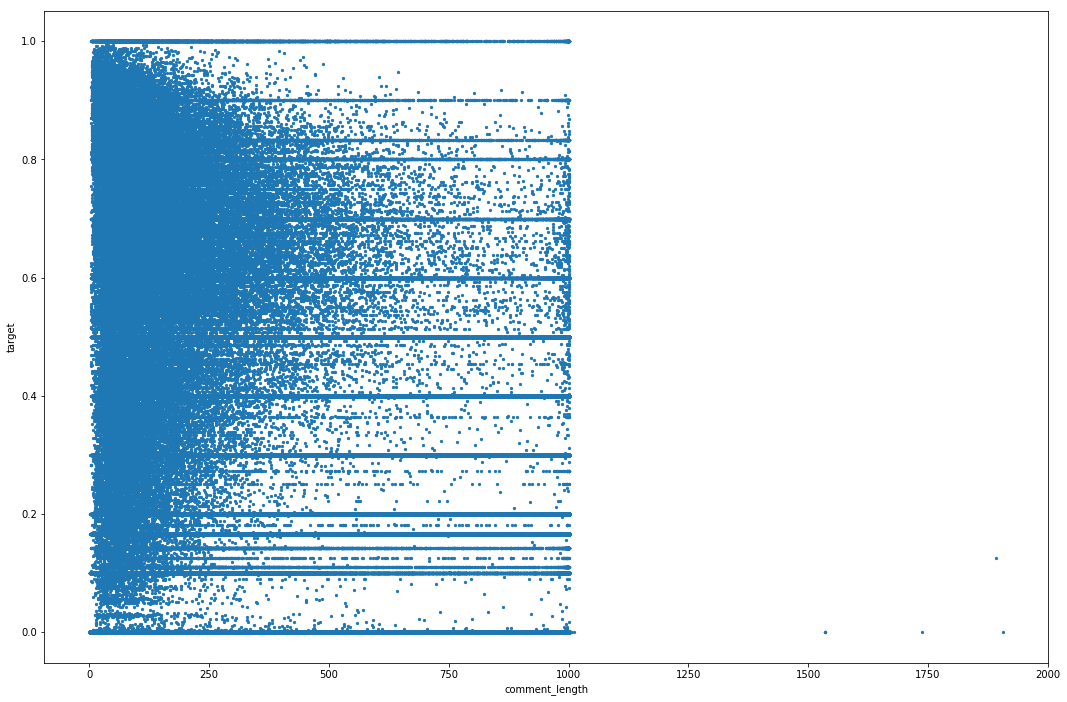

In [0]:
rawData["comment_length"] = rawData["comment_text"].apply(lambda x: len(x))
rawData.plot.scatter(x="comment_length",y="target", marker=".")

### Number of comments according to time

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


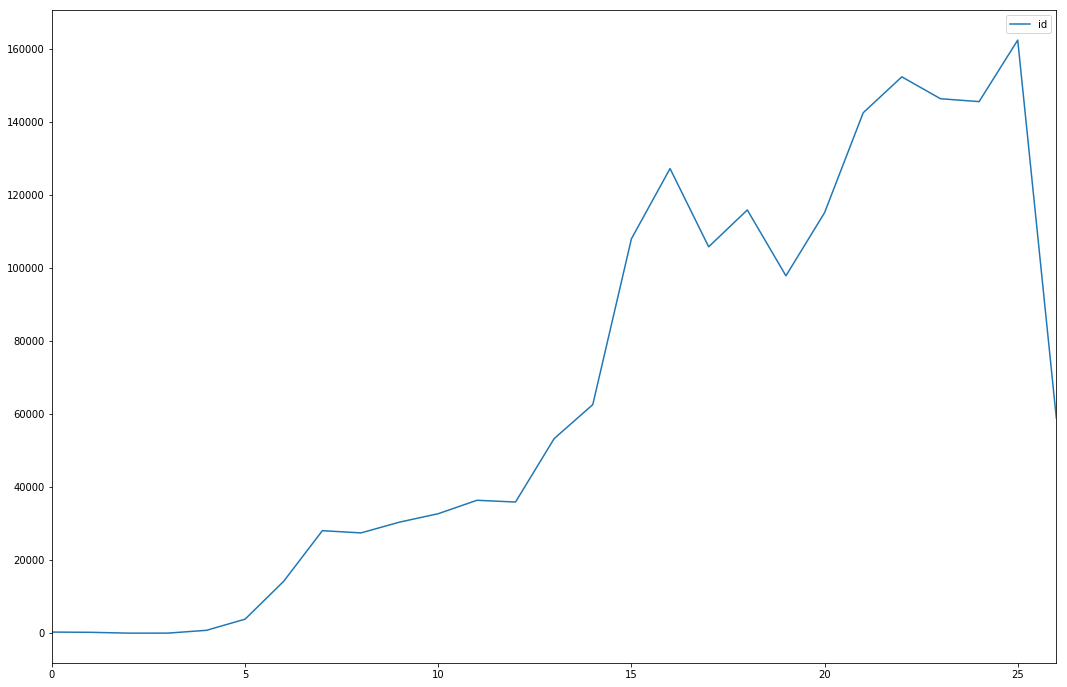

In [0]:
rawData["created_date"] = pd.to_datetime(rawData["created_date"])
rawData["created_year_month"] = rawData["created_date"].dt.to_period('M')
comment_date_df = rawData.groupby('created_year_month', as_index=False)['id'].agg('count')
comment_date_df.plot()

### How toxicity changes according to time
Are people getting better or worse

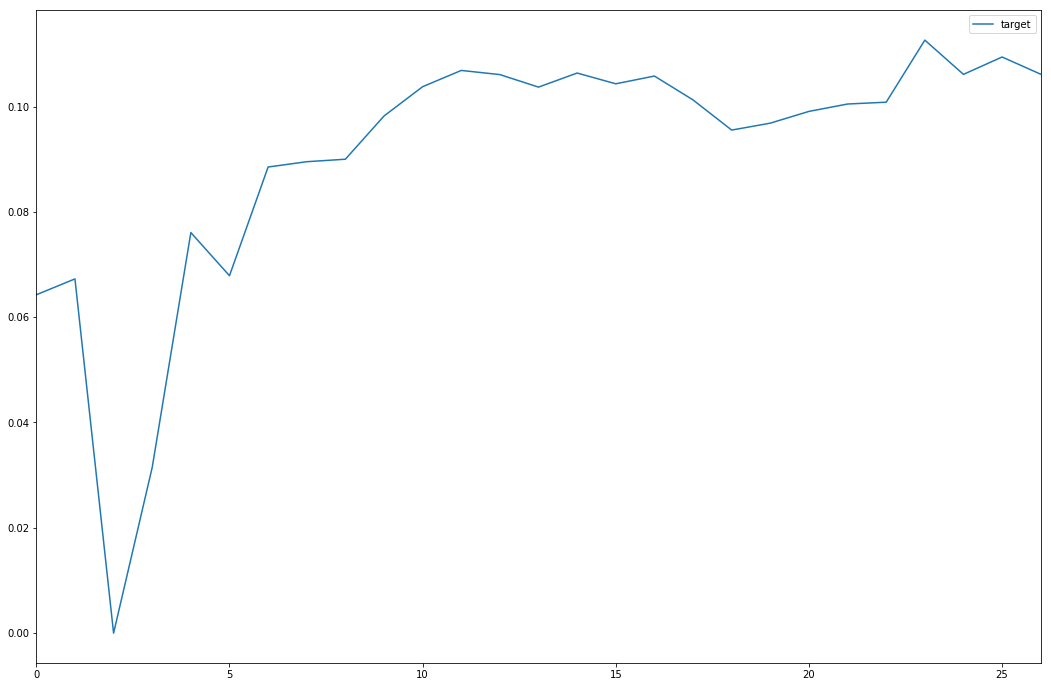

In [0]:
toxicity_date_df = rawData.groupby('created_year_month', as_index=False)['target'].agg('mean')
toxicity_date_df.plot()

### When do people become mean

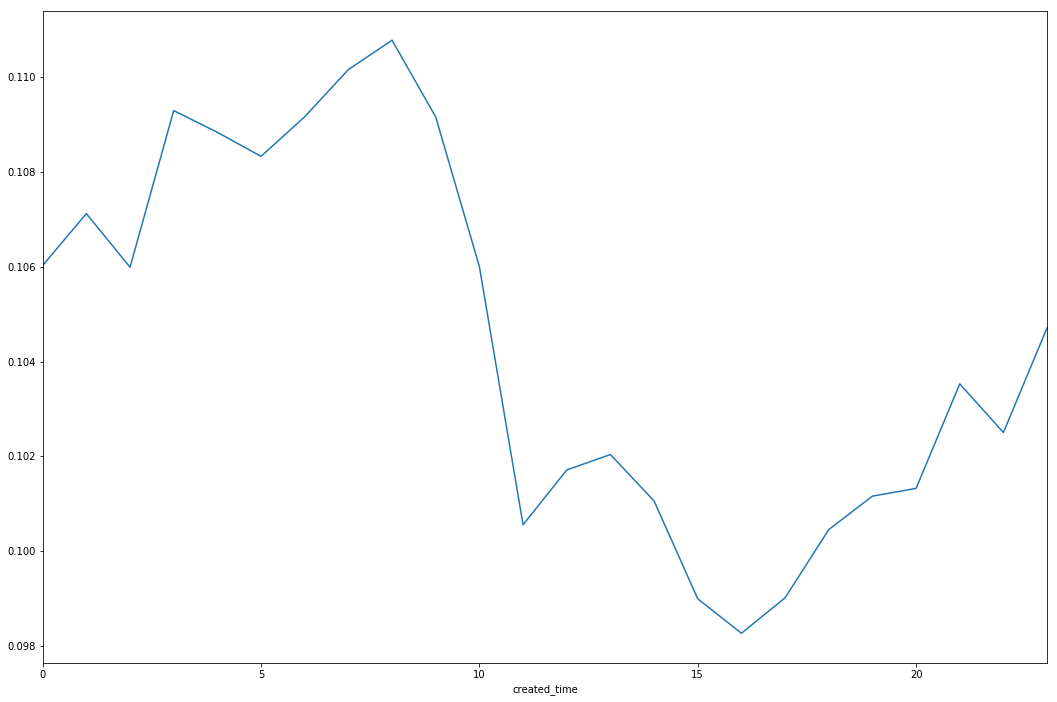

In [0]:
rawData["created_time"] = rawData["created_date"].apply(lambda x: x.hour)
toxicity_time_df = rawData.groupby('created_time')['target'].agg('mean')
toxicity_time_df.plot()

### Disribution of race group among toxic comments

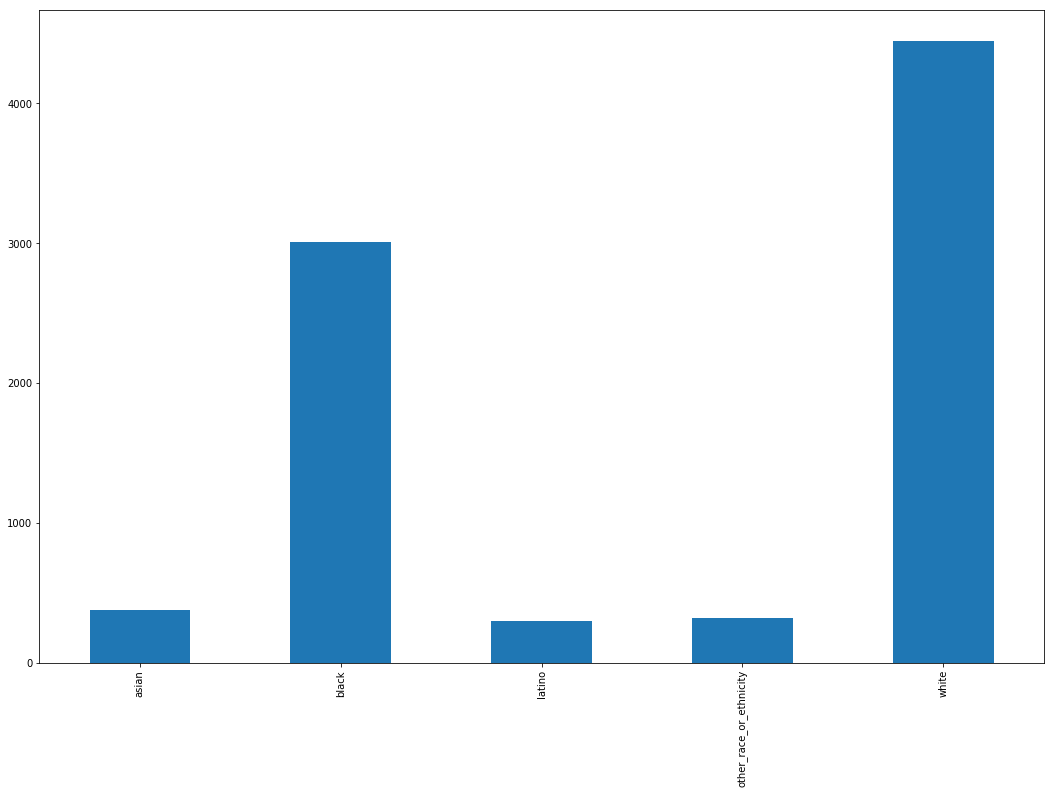

In [0]:
race_gp = ['asian', 'black', 'latino', 'other_race_or_ethnicity', 'white']
toxic_comment_df = rawData[rawData["target"] > 0.5]
summary_race = toxic_comment_df[race_gp].sum(axis = 0, skipna = True) 
summary_race.plot.bar()

### How do people think about disability groups

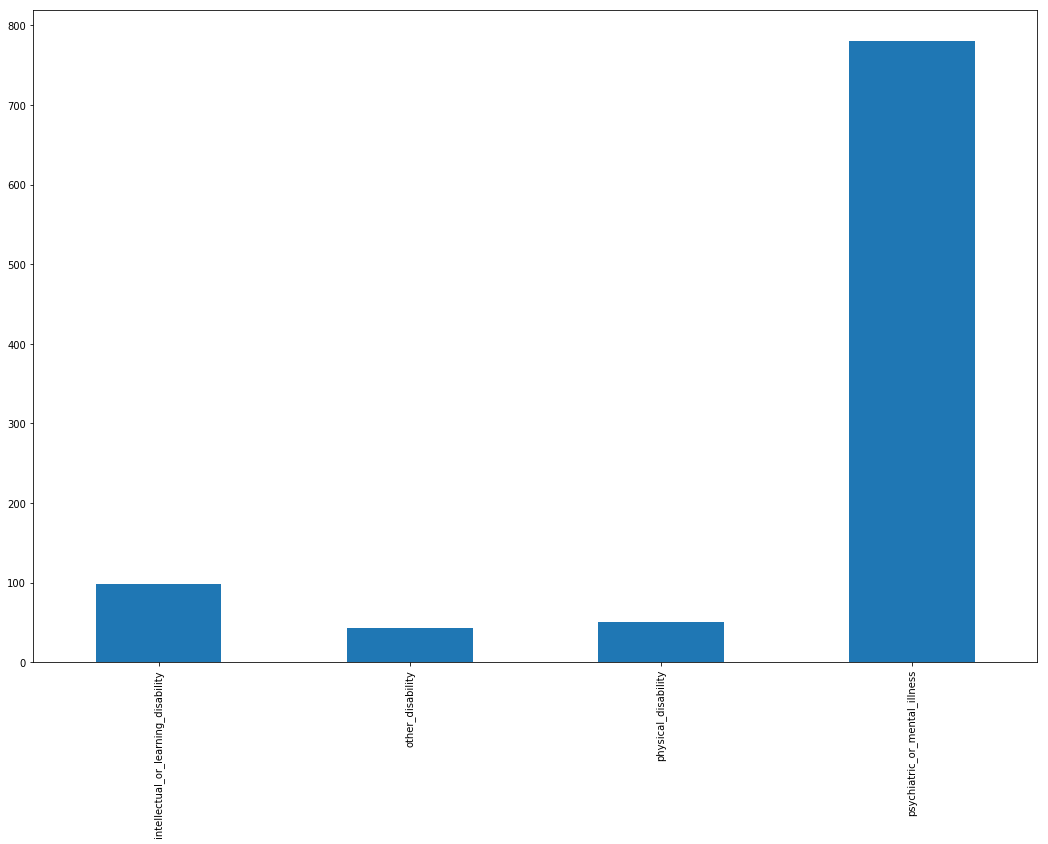

In [0]:
disability_gp = ['intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']
summary_disability = toxic_comment_df[disability_gp].sum(axis = 0, skipna = True) 
summary_disability.plot.bar()

### Religion

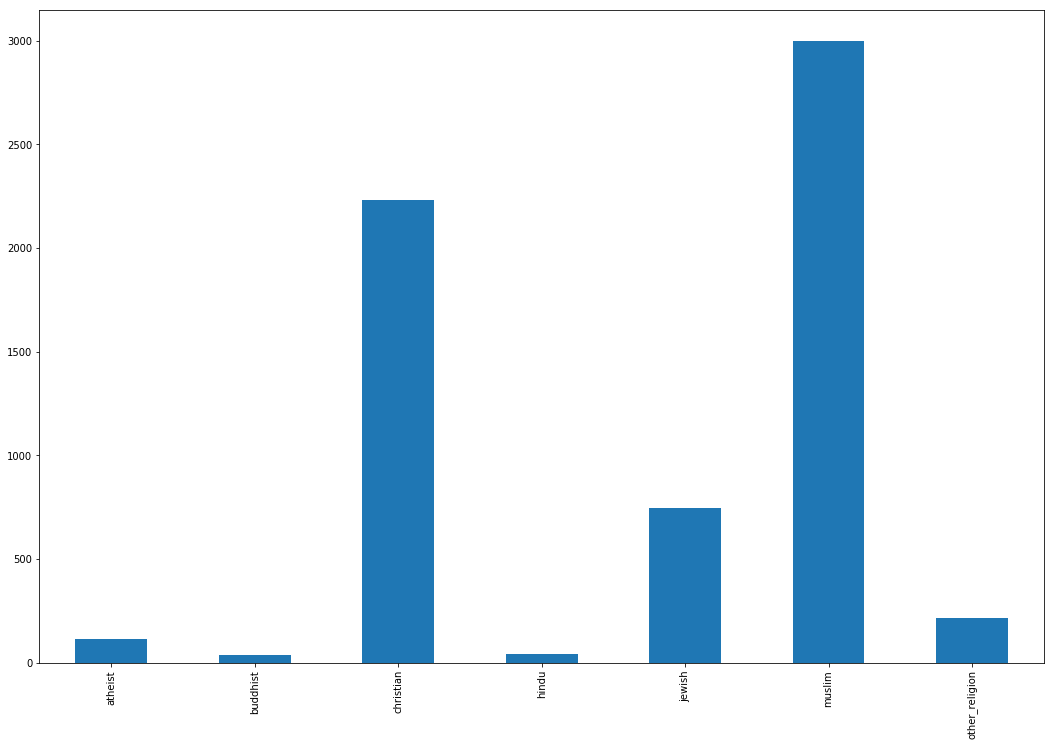

In [0]:
religion_gp = ['atheist', 'buddhist', 'christian', 'hindu', 'jewish', 'muslim', 'other_religion']
summary_religion = toxic_comment_df[religion_gp].sum(axis = 0, skipna = True) 
summary_religion.plot.bar()

### Gender

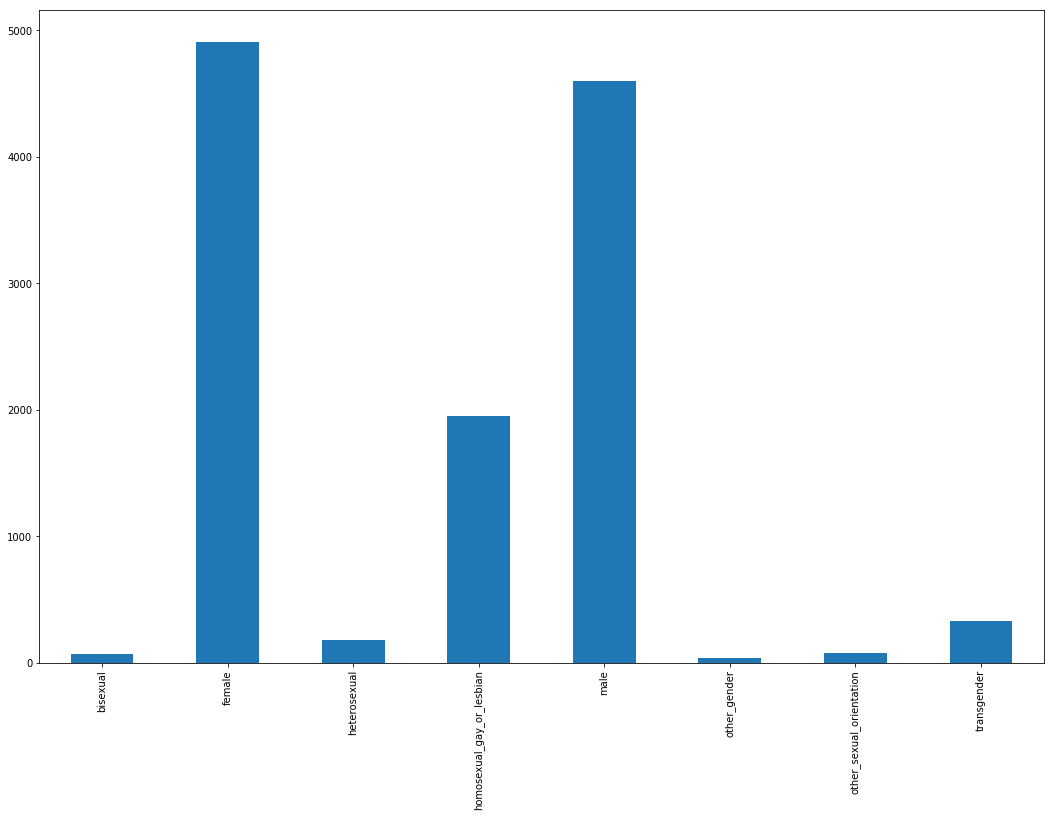

In [0]:
gender_gp = ['bisexual', 'female', 'heterosexual',  'homosexual_gay_or_lesbian', 'male', 'other_gender', 'other_sexual_orientation', 'transgender']
summary_gender = toxic_comment_df[gender_gp].sum(axis = 0, skipna = True) 
summary_gender.plot.bar()

## Type of toxic comment

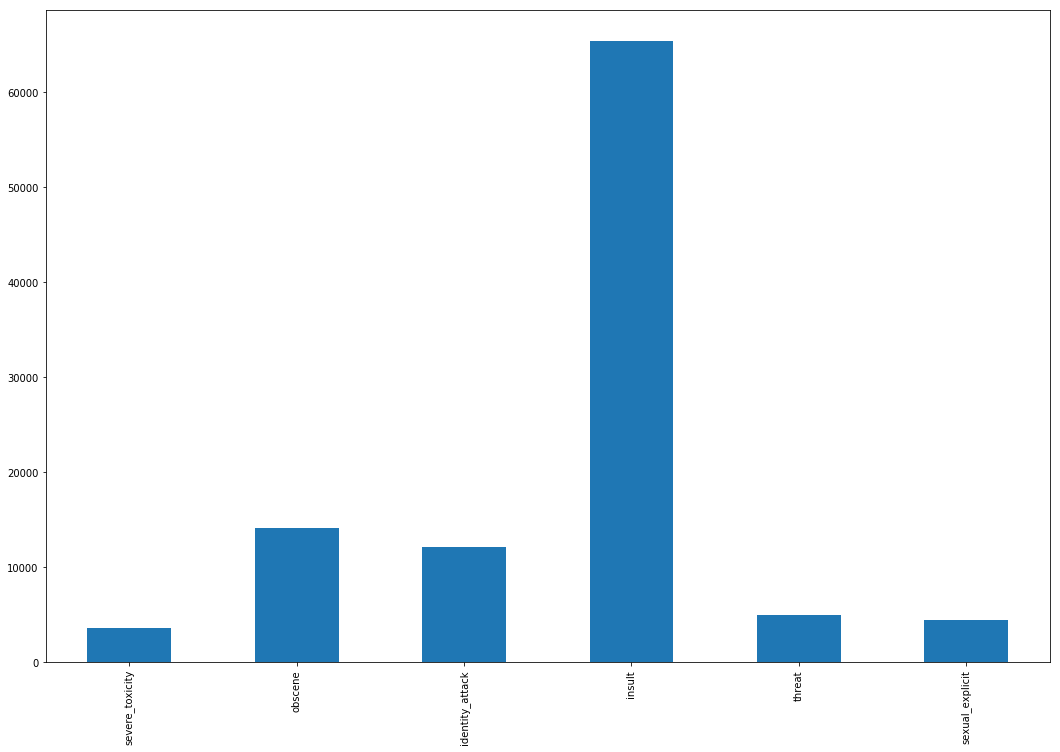

In [0]:
toxicity_gp = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat' , 'sexual_explicit']
summary_toxicity = toxic_comment_df[toxicity_gp].sum(axis = 0, skipna = True) 
summary_toxicity.plot.bar()